<a href="https://colab.research.google.com/github/bruno82usa/FIAP-PBL-Fase5-FarmTech/blob/main/Bruno_Gambarini_RM561517_pbl_fase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
# --- Bloco 0: Importação das Bibliotecas Essenciais ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# --- Definindo cores para o print ---
VERDE = '\033[92m'
AZUL = '\033[94m'
AMARELO = '\033[93m'
VERMELHO = '\033[91m'
RESET = '\033[0m'

print(f"{VERDE}Bibliotecas importadas com sucesso!{RESET}")

Bibliotecas importadas com sucesso!


In [127]:
print("" + "="*50)
print(f"{VERDE}PROJETO PBL FASE 5 - FARMTCH SOLUTIONS{RESET}")
print("="*50)
print(f"{AMARELO}Análise de Dados e Machine Learning para Previsão de Safra{RESET}")

PROJETO PBL FASE 5 - FARMTCH SOLUTIONS
Análise de Dados e Machine Learning para Previsão de Safra


In [106]:
# ==============================================================================
# ETAPA 1: CARREGAMENTO E PREPARAÇÃO INICIAL DOS DADOS
# ==============================================================================

In [110]:
# --- Bloco de Carregamento e Análise ---
try:
    df = pd.read_csv('crop_yield.csv')
    df.rename(columns={
        'Crop': 'Cultura',
        'Precipitation (mm day-1)': 'Precipitacao',
        'Specific Humidity at 2 Meters (g/kg)': 'Umidade_Especifica',
        'Relative Humidity at 2 Meters (%)': 'Umidade_Relativa',
        'Temperature at 2 Meters (C)': 'Temperatura',
        'Yield': 'Rendimento'
    }, inplace=True)
    print(f"\n{VERDE}Arquivo 'crop_yield.csv' carregado e colunas renomeadas com sucesso!{RESET}")

except FileNotFoundError:
    print(f"\n{VERMELHO}ERRO: O arquivo 'crop_yield.csv' não foi encontrado.{RESET}")
    print("Por favor, faça o upload do arquivo no menu à esquerda do Google Colab antes de executar.")


print("\n\n" + "="*50)
print(f"{VERDE}PARTE 1: ANÁLISE EXPLORATÓRIA DE DADOS (EDA){RESET}")
print("="*50)
print(f"{AMARELO}Objetivo: Conhecer os dados, suas distribuições e correlações.{RESET}")

print(f"\n{AZUL}--- Visualização Inicial dos Dados ---{RESET}")
print(df.head())

print(f"\n{AZUL}--- Informações Gerais do DataFrame ---{RESET}")
df.info()

print(f"\n{AZUL}--- Descrição Estatística dos Dados Numéricos ---{RESET}")
print(df.describe())

print(f"\n{AZUL}--- Verificação de Dados Faltantes por Coluna ---{RESET}")
print(df.isnull().sum())

print(f"\n{VERDE}--- Gerando Gráficos da Análise Exploratória ---{RESET}")


Arquivo 'crop_yield.csv' carregado e colunas renomeadas com sucesso!


PARTE 1: ANÁLISE EXPLORATÓRIA DE DADOS (EDA)
Objetivo: Conhecer os dados, suas distribuições e correlações.

--- Visualização Inicial dos Dados ---
        Cultura  Precipitacao  Umidade_Especifica  Umidade_Relativa  \
0  Cocoa, beans       2248.92               17.72             83.40   
1  Cocoa, beans       1938.42               17.54             82.11   
2  Cocoa, beans       2301.54               17.81             82.79   
3  Cocoa, beans       2592.35               17.61             85.07   
4  Cocoa, beans       2344.72               17.61             84.12   

   Temperatura  Rendimento  
0        26.01       11560  
1        26.11       11253  
2        26.24        9456  
3        25.56        9321  
4        25.76        8800  

--- Informações Gerais do DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column              Non-Null 

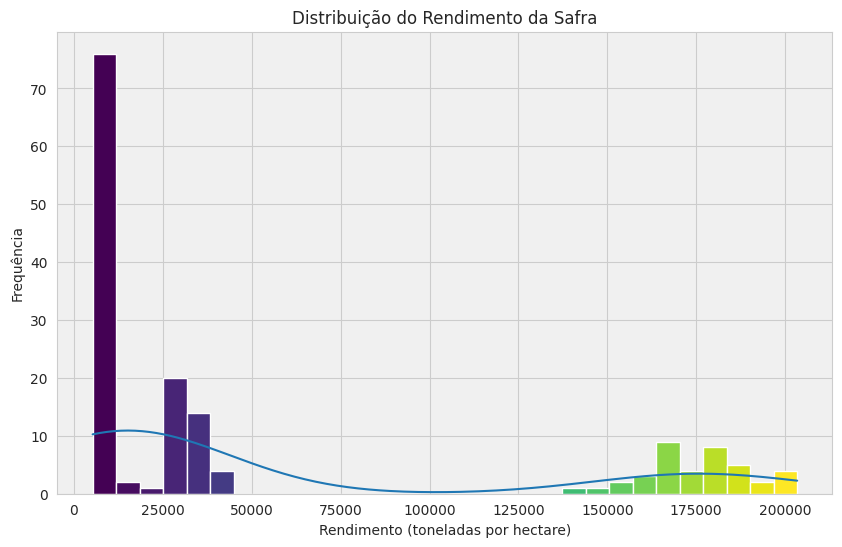

In [112]:
# Gráfico 1: Distribuição do Rendimento (com cores em gradiente)
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['Rendimento'], kde=True, bins=30)
patches = ax.patches
cmap = plt.get_cmap('viridis')
for i, patch in enumerate(patches):
    color = cmap(i / (len(patches) - 1))
    patch.set_facecolor(color)

plt.title('Distribuição do Rendimento da Safra')
plt.xlabel('Rendimento (toneladas por hectare)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

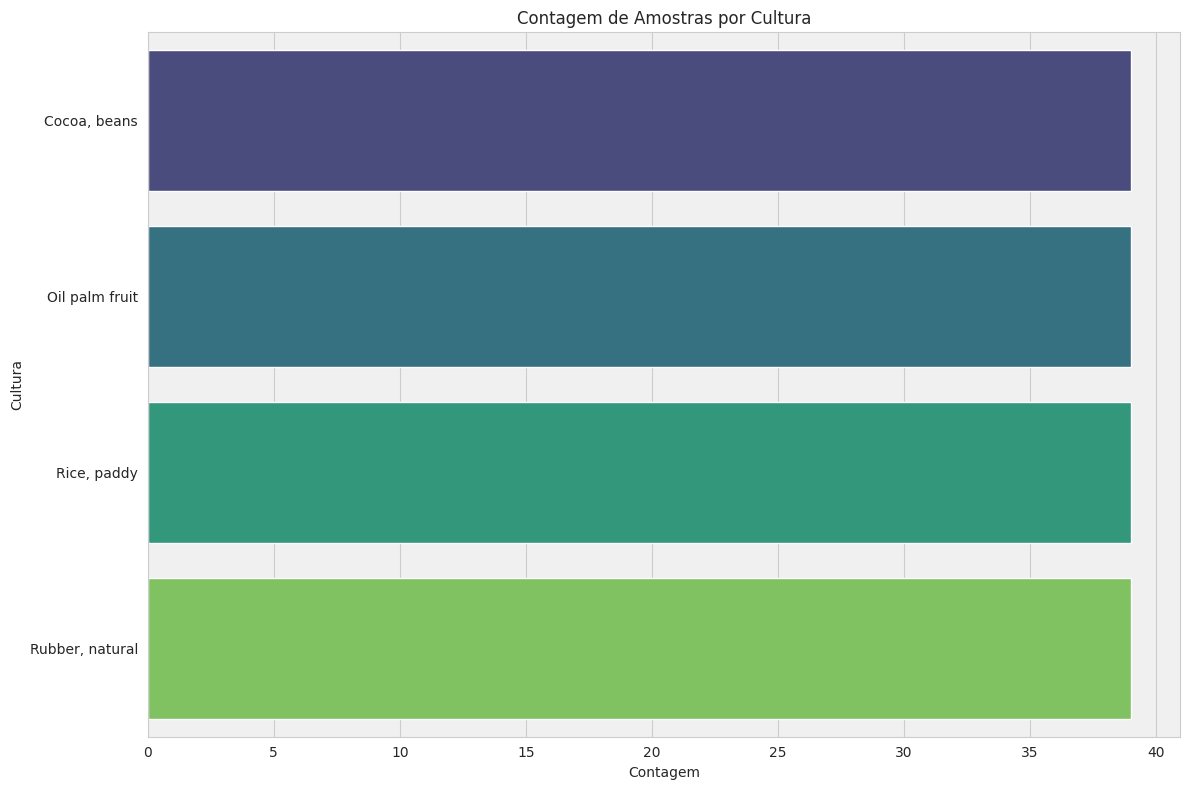

In [113]:
# Gráfico 2: Contagem por Cultura
plt.figure(figsize=(12, 8))
sns.countplot(
    y=df['Cultura'],
    order = df['Cultura'].value_counts().index,
    palette='viridis'
)
plt.title('Contagem de Amostras por Cultura')
plt.xlabel('Contagem')
plt.ylabel('Cultura')
plt.tight_layout()
plt.show()

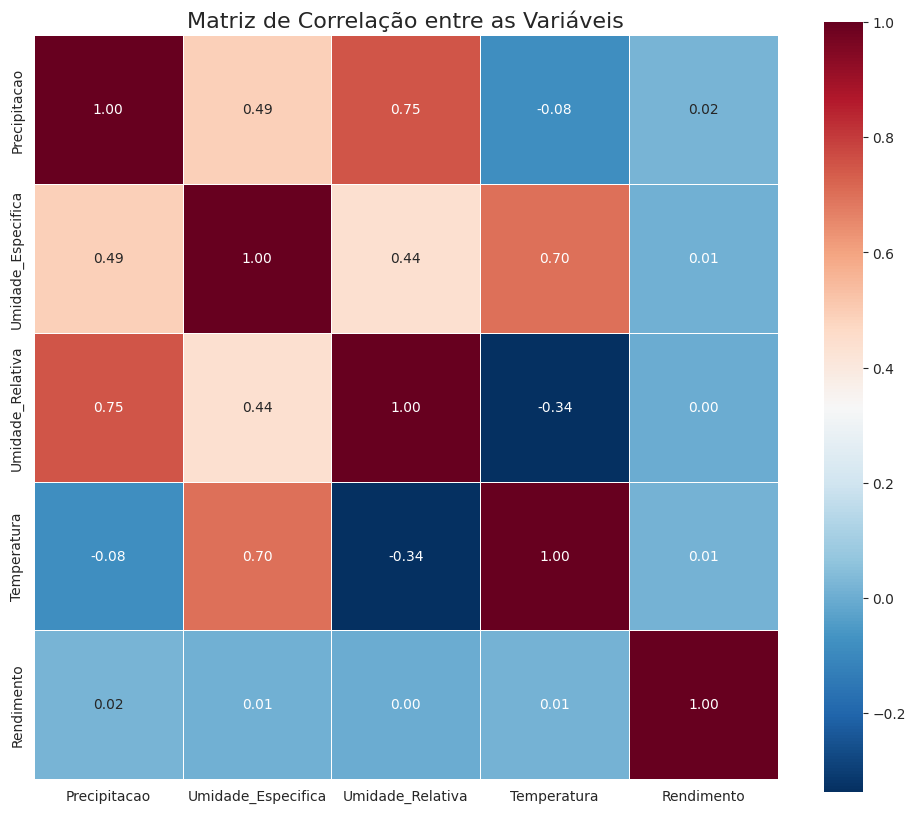

In [115]:
# Gráfico 3: Matriz de Correlação
plt.figure(figsize=(12, 10))
sns.heatmap(
    df.select_dtypes(include=np.number).corr(),
    annot=True,
    fmt=".2f",
    cmap='RdBu_r',
    linewidths=.5,
    square=True
)
plt.title('Matriz de Correlação entre as Variáveis', fontsize=16)
plt.show()

In [128]:
print("" + "="*50)
print(f"{VERDE}PARTE 2: ANÁLISE DE CLUSTERS (MACHINE LEARNING NÃO SUPERVISIONADO){RESET}")
print("="*50)
print(f"{AMARELO}Objetivo: Encontrar tendências e grupos de safras com características similares.{RESET}")

PARTE 2: ANÁLISE DE CLUSTERS (MACHINE LEARNING NÃO SUPERVISIONADO)
Objetivo: Encontrar tendências e grupos de safras com características similares.



--- Método do Cotovelo para Encontrar o 'K' Ideal ---


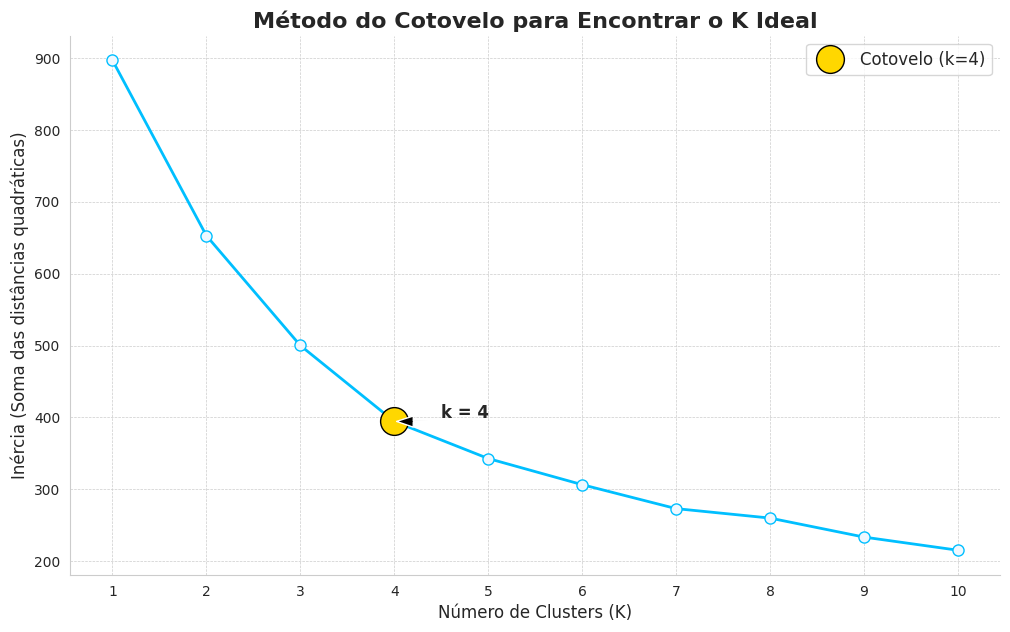

In [118]:
from matplotlib.patches import ConnectionPatch

# Pré-processamento dos dados para clusterização
categorical_features_cluster = ['Cultura']
numerical_features_cluster = ['Precipitacao', 'Umidade_Especifica', 'Umidade_Relativa', 'Temperatura', 'Rendimento']
preprocessor_cluster = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features_cluster), ('cat', OneHotEncoder(), categorical_features_cluster)])
X_processed = preprocessor_cluster.fit_transform(df)

print(f"\n{VERDE}--- Método do Cotovelo para Encontrar o 'K' Ideal ---{RESET}")
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_processed)
    inertia.append(kmeans.inertia_)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

plt.plot(K_range, inertia, 'o-', color='deepskyblue', linewidth=2, markersize=8, markerfacecolor='aliceblue', markeredgecolor='deepskyblue')

# Lógica para encontrar o ponto do "cotovelo" (k=4 neste caso)
# Este é um valor visualmente identificado, mas ideal para destacar
elbow_k = 4
elbow_inertia = inertia[elbow_k - 1]

plt.plot(elbow_k, elbow_inertia, 'o', markersize=20, markerfacecolor='gold', markeredgecolor='black', label=f'Cotovelo (k={elbow_k})')

# Adicionar uma anotação elegante para o ponto
plt.annotate(
    f'k = {elbow_k}',
    xy=(elbow_k, elbow_inertia),
    xytext=(elbow_k + 0.5, elbow_inertia + 5),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    fontsize=12,
    fontweight='bold'
)

# Títulos e legendas
plt.xlabel('Número de Clusters (K)', fontsize=12)
plt.ylabel('Inércia (Soma das distâncias quadráticas)', fontsize=12)
plt.title('Método do Cotovelo para Encontrar o K Ideal', fontsize=16, fontweight='bold')
plt.xticks(K_range)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Remover a borda superior e direita para um visual mais limpo
sns.despine()

plt.show()

In [119]:
# --- Aplicação do K-Means e Análise dos Clusters ---
ideal_k = 4
print(f"\n{VERDE}O 'cotovelo' sugere K=3 ou K=4. Escolhendo K={ideal_k} para a análise.{RESET}")
kmeans = KMeans(n_clusters=ideal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_processed)

print(f"\n{AMARELO}--- Análise das Características Médias por Cluster (k={ideal_k}) ---{RESET}")
cluster_analysis = df.groupby('Cluster')[numerical_features_cluster].mean().sort_values(by='Rendimento', ascending=False)
print(cluster_analysis)


O 'cotovelo' sugere K=3 ou K=4. Escolhendo K=4 para a análise.

--- Análise das Características Médias por Cluster (k=4) ---
         Precipitacao  Umidade_Especifica  Umidade_Relativa  Temperatura  \
Cluster                                                                    
3         2583.203929           18.300000         85.141071    26.189643   
2         2229.869512           17.788049         83.879512    25.977561   
0         2353.613333           18.409722         84.105556    26.505278   
1         2733.517647           18.337647         85.652353    26.118824   

            Rendimento  
Cluster                 
3        176341.500000  
2         46495.756098  
0         29671.416667  
1         16624.000000  


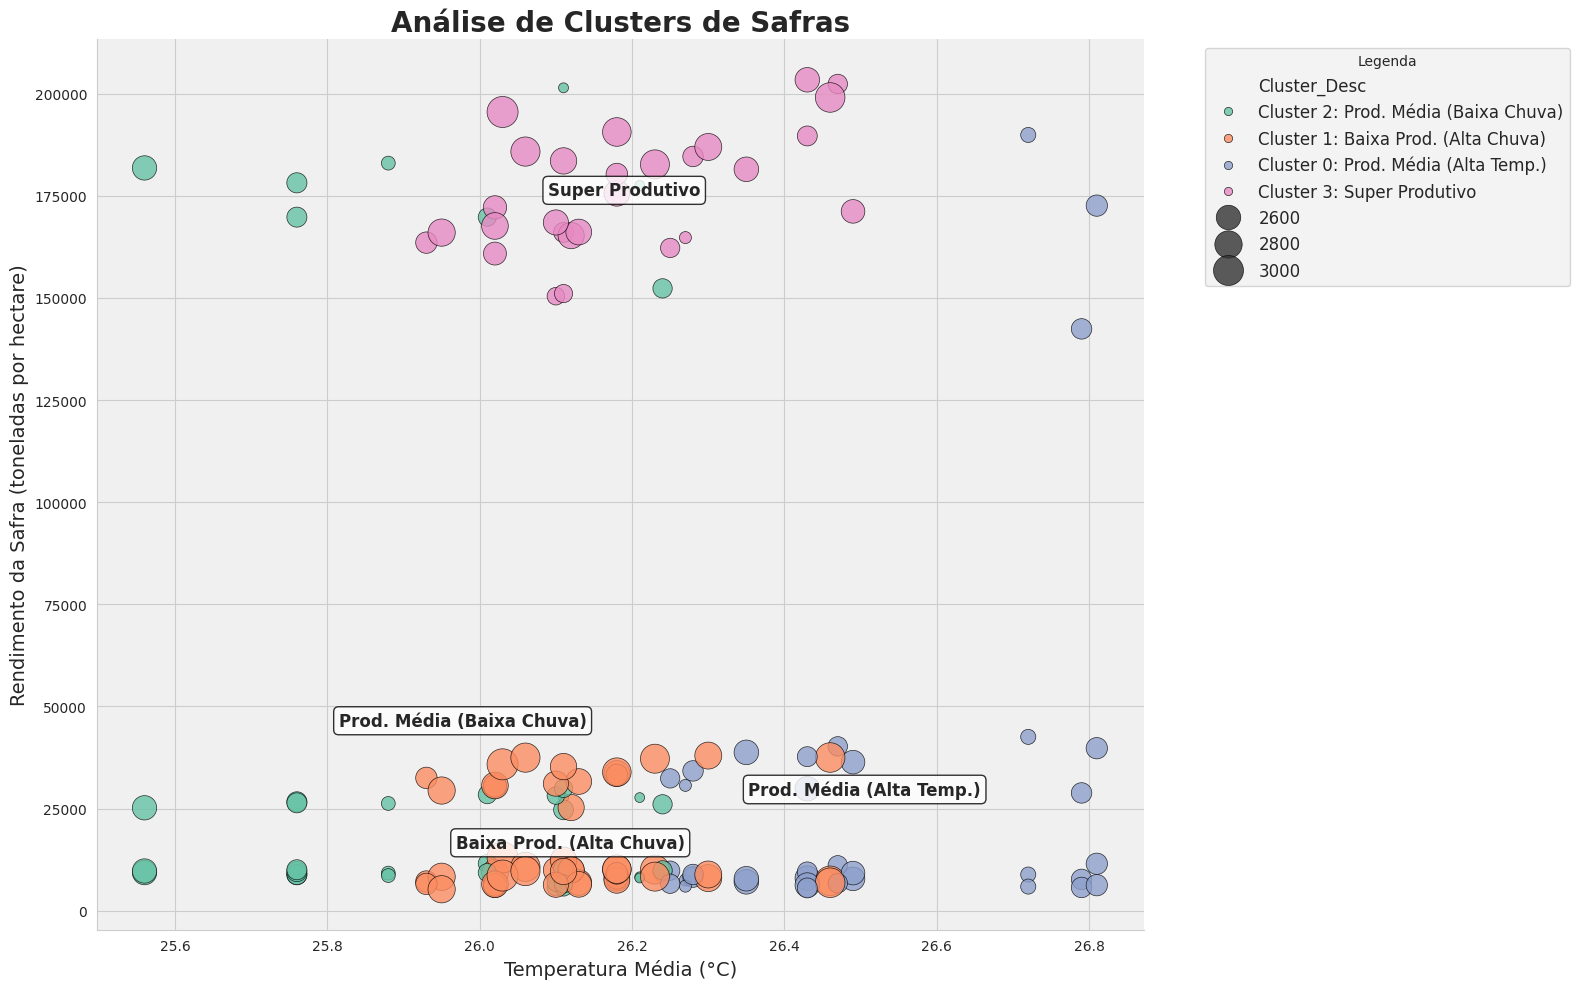

In [120]:
# --- Gráfico de Dispersão dos Clusters ---

sns.set_style("whitegrid", {'axes.facecolor': '#f0f0f0'})
plt.figure(figsize=(16, 10))

cluster_labels = {
    3: 'Cluster 3: Super Produtivo',
    2: 'Cluster 2: Prod. Média (Baixa Chuva)',
    0: 'Cluster 0: Prod. Média (Alta Temp.)',
    1: 'Cluster 1: Baixa Prod. (Alta Chuva)'
}
df['Cluster_Desc'] = df['Cluster'].map(cluster_labels)

# Criar o gráfico de dispersão principal
ax = sns.scatterplot(
    data=df,
    x='Temperatura',
    y='Rendimento',
    hue='Cluster_Desc',
    size='Precipitacao',
    sizes=(50, 500),
    palette='Set2',
    alpha=0.8,
    edgecolor='black',
    linewidth=0.5
)

# --- Lógica para adicionar os rótulos no centro de cada cluster ---
for cluster_num, label in cluster_labels.items():
    # Calcular o ponto central (centroide) de cada cluster
    cluster_center = df[df['Cluster'] == cluster_num][['Temperatura', 'Rendimento']].mean()

    # Adicionar o texto no centro do cluster
    plt.text(
        x=cluster_center['Temperatura'],
        y=cluster_center['Rendimento'],
        s=label.split(':')[1].strip(), # Usar um texto mais curto para o rótulo
        fontsize=12,
        fontweight='bold',
        ha='center',
        va='center',
        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1, alpha=0.8)
    )

# Melhorar os títulos, legendas e eixos
plt.title('Análise de Clusters de Safras', fontsize=20, fontweight='bold')
plt.xlabel('Temperatura Média (°C)', fontsize=14)
plt.ylabel('Rendimento da Safra (toneladas por hectare)', fontsize=14)

# Personalizar a legenda
h, l = ax.get_legend_handles_labels()
plt.legend(h[0:5] + h[-3:], l[0:5] + l[-3:], title='Legenda', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Remover as bordas do gráfico para um visual mais limpo
sns.despine()
plt.tight_layout()
plt.show()

In [126]:
print("" + "="*50)
print(f"{VERDE}PARTE 3: MODELAGEM PREDITIVA (MACHINE LEARNING SUPERVISIONADO){RESET}")
print("="*50)
print(f"{AMARELO}Objetivo: Criar 5 modelos para prever o rendimento e avaliar qual o melhor.{RESET}")

PARTE 3: MODELAGEM PREDITIVA (MACHINE LEARNING SUPERVISIONADO)
Objetivo: Criar 5 modelos para prever o rendimento e avaliar qual o melhor.


In [129]:
# Preparação dos dados para regressão
X = df.drop(['Rendimento', 'Cluster'], axis=1)
y = df['Rendimento']
categorical_features_model = ['Cultura']
numerical_features_model = ['Precipitacao', 'Umidade_Especifica', 'Umidade_Relativa', 'Temperatura']
preprocessor_model = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features_model), ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_model)])

# Divisão em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\n{VERDE}--- Preparação de Dados para Modelagem ---{RESET}")
print(f"Dados divididos em treino ({len(X_train)} amostras) e teste ({len(X_test)} amostras).")


--- Preparação de Dados para Modelagem ---
Dados divididos em treino (124 amostras) e teste (32 amostras).


In [130]:
# ==============================================================================
# ETAPA FINAL: TREINAMENTO E AVALIAÇÃO DOS MODELOS PREDITIVOS 🚀
# ==============================================================================

# --- Definição dos Modelos ---
# Foi criado um dicionário onde cada chave é o nome de um algoritmo de regressão
# e o valor é o próprio objeto do modelo, pronto para ser treinado.
# Isso nos permite iterar sobre eles de forma organizada.
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor (SVR)": SVR(kernel='rbf')
}

# Dicionário vazio para armazenar os resultados (métricas) de cada modelo.
results = {}

print(f"\n{AMARELO}--- Treinando e Avaliando os 5 Modelos ---{RESET}")
print("Para cada modelo, o processo é o seguinte:")
print("1. Cria-se um 'Pipeline' que primeiro pré-processa os dados e depois treina o modelo.")
print("2. O modelo é treinado com os dados de treino.")
print("3. O modelo faz previsões nos dados de teste (que ele nunca viu antes).")
print("4. As previsões são comparadas com os valores reais para calcular as métricas de performance.")
print("-" * 30)

# --- Loop de Treinamento e Avaliação ---
# Este loop passará por cada um dos 5 modelos que definimos acima.
for name, model in models.items():
    try:
        # O Pipeline é uma das melhores práticas em Machine Learning.
        # Ele garante que o pré-processamento (como o StandardScaler) seja
        # ajustado APENAS com os dados de treino, evitando vazamento de dados.
        pipeline = Pipeline(steps=[('preprocessor', preprocessor_model),
                                   ('regressor', model)])

        # 1. Treinamento: O modelo "aprende" os padrões dos dados de treino.
        pipeline.fit(X_train, y_train)

        # 2. Previsão: O modelo treinado tenta prever o rendimento para os dados de teste.
        y_pred = pipeline.predict(X_test)

        # 3. Avaliação: Calculamos o quão boas foram as previsões.
        # MAE (Erro Absoluto Médio): A média de erro das previsões. Quanto menor, melhor.
        mae = mean_absolute_error(y_test, y_pred)
        # R² Score: Explica a porcentagem da variação que o modelo consegue prever. Quanto mais perto de 1, melhor.
        r2 = r2_score(y_test, y_pred)

        # 4. Armazenamento: Guardamos as métricas no nosso dicionário de resultados.
        results[name] = {'MAE': mae, 'R2 Score': r2}

        # Feedback visual colorido sobre a performance do modelo.
        if r2 >= 0:
            print(f"✅ {VERDE}- Modelo '{name}' avaliado com sucesso.{RESET}")
        else:
            print(f"❌ {VERMELHO}- Modelo '{name}' apresentou performance ruim (R² negativo).{RESET}")

    except Exception as e:
        print(f"❌ {VERMELHO}- Modelo '{name}' falhou durante o treinamento. Erro: {e}{RESET}")


--- Treinando e Avaliando os 5 Modelos ---
Para cada modelo, o processo é o seguinte:
1. Cria-se um 'Pipeline' que primeiro pré-processa os dados e depois treina o modelo.
2. O modelo é treinado com os dados de treino.
3. O modelo faz previsões nos dados de teste (que ele nunca viu antes).
4. As previsões são comparadas com os valores reais para calcular as métricas de performance.
------------------------------
✅ - Modelo 'Linear Regression' avaliado com sucesso.
✅ - Modelo 'Random Forest' avaliado com sucesso.
✅ - Modelo 'Decision Tree' avaliado com sucesso.
✅ - Modelo 'Gradient Boosting' avaliado com sucesso.
❌ - Modelo 'Support Vector Regressor (SVR)' apresentou performance ruim (R² negativo).
